#  Map Petroleum Spills in New York State by County

## Author: Sofia Rodas
https://github.com/sofiiir/eds220-hwk3.git

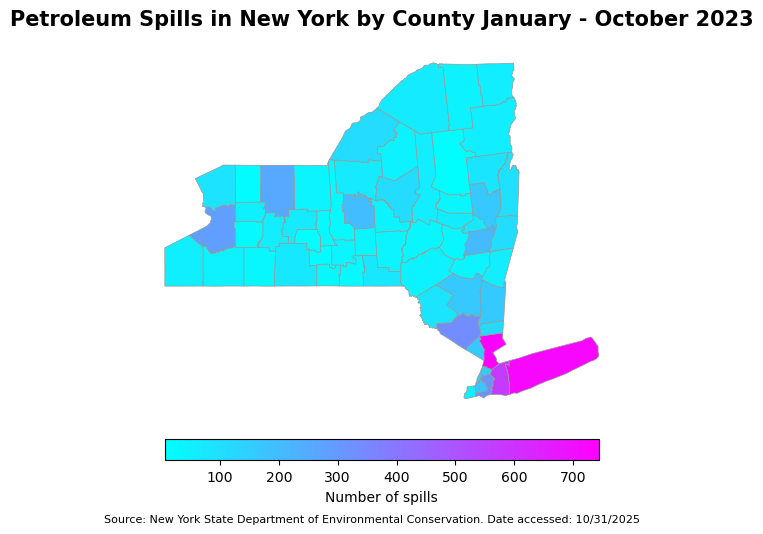

In [1]:
# Load necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Code to address error when reading in data
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# Read in spills data
fp = os.path.join('data', 'Spill_Incidents_20251031.csv')
spills = pd.read_csv(fp)

# Read in census data 
fp = os.path.join('data', 'census_data_2023', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

# Change column names to lower snake
spills.columns = (spills.columns
                  .str.lower()
                  .str.replace(' ', '_'))

# Change data type of spill dates to datetime
spills.spill_date = pd.to_datetime(spills['spill_date'])

# Select observations between January 1, 2023 and Octover 31, 2023 for Petroleum spills
petr_23 =  (spills[(spills['spill_date'] >= '2023-01-01') & 
                   (spills['spill_date']<= '2023-10-31') & 
                   (spills['material_family'] == 'Petroleum')]) 

# Create a new data frame with the number of petroleum spills from Janurary to October 2023
spills_per_county = petr_23.groupby('county').size().to_frame('n_spills').reset_index()

# Change column names to lower snake
counties.columns = (counties.columns
                  .str.lower())

# Subset for only New York 
ny_counties = counties[counties['statefp'] == '36']

# Replace 'St Lawrence' with 'St. Lawrence' 
spills_per_county['county'] = spills_per_county['county'].str.replace('St Lawrence', 'St. Lawrence')

# Remove New Jersey county from the spills data frame since its not in New York
spills_per_county = spills_per_county[~spills_per_county.county.isin(['New Jersey - Region 2'])]

# Change the column name from namesel to county in the ny_counties data frame
ny_counties = ny_counties.rename(columns = {'name':'county'})

# Inner join data frames 
ny_counties = pd.merge(ny_counties,
                       spills_per_county, 
                       how ='inner',
                       on = 'county')

# Add one spill to Niagara County to account for the Tuscarora Indian Reservation spill 
ny_counties.at[45, 'n_spills'] +=1

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
ny_counties.plot(
    ax=ax,
    column='n_spills',
    cmap='cool',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of spills",
        "orientation": "horizontal", # change orientation
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Petroleum Spills in New York by County January - October 2023', fontsize=15, weight='bold', pad=15)

# Add citatation of data and date of data access
plt.suptitle("Source: New York State Department of Environmental Conservation. Date accessed: 10/31/2025",
            fontsize = 8,
            x = 0.5, 
            y = 0.1) # Move subtitle to the bottom of the map


plt.show()